In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Source: https://scentellegher.github.io/visualization/2018/10/10/beautiful-bar-plots-matplotlib.html
#plt.rcParams['font.family'] = 'sans-serif'
#plt.rcParams['font.sans-serif'] = 'Helvetica'
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.style.use('ggplot')

In [3]:
df = pd.read_csv('topics.csv')

In [4]:
df.head()

,Authors,Title,Link,Venue,Cites,Year,Method,Topics,Comments,Funding,Unnamed: 10
0,"Menzies, T., & Pecheur, C.",Verification and validation and artificial int...,NaN,Advances in computers,60,2005,NaN,NaN,Discusses V&V methods in SE and AI in general,NASA,NaN
1,"Lakkaraju, H., Kamar, E., Caruana, R., & Horvi...",Identifying unknown unknowns in the open world...,https://arxiv.org/pdf/1610.09064.pdf,AAAI Conference on Artificial Intelligence.,62,2017,DSP + multi-armed bandit formulation,"DSP, multi-armed bandit",NaN,NaN,NaN
2,"Tjeng, V., Xiao, K., & Tedrake, R.",Evaluating robustness of neural networks with ...,https://arxiv.org/pdf/1711.07356.pdf,arXiv,102,2017,MILP,MILP,Needs a closer read; kind of tangential; discu...,Lockheed Martin Corporation and NSF,NaN
3,"Kim, B., Gilmer, J., Wattenberg, M., & Viégas, F.",Tcav: Relative concept importance testing with...,https://openreview.net/pdf?id=S1viikbCW,ICLR,17,2018,concept vectors at each layer for explanation,concept vectors,Really cool paper,NaN,NaN
4,"Uesato, J., Kumar, A., Szepesvari, C., Erez, T...",Rigorous agent evaluation: An adversarial appr...,https://arxiv.org/pdf/1812.01647.pdf,arXiv,3,2018,use earlier iteration data to predict risk of ...,historical data,NaN,NaN,NaN


In [5]:
topics = df[['Topics', 'Year']]

In [6]:
topics = topics[topics['Topics'].notna()]

In [7]:
topics

,Topics,Year
1,"DSP, multi-armed bandit",2017
2,MILP,2017
3,concept vectors,2018
4,historical data,2018
5,"SAT solver, marabou",2019
...,...,...
119,rule-based method,1997
120,rule-based method,1993
121,rule-based method,1992
122,mutation testing,1992


In [8]:
t = {}
for _, row in topics.iterrows():
    for topic in row['Topics'].split(', '):
        if int(row['Year']) in t:
            t[int(row['Year'])].append(topic)
        else:
            t[int(row['Year'])] = [topic]

In [9]:
t

{2017: ['DSP',
  'multi-armed bandit',
  'MILP',
  'simplex',
  'NN',
  'new loss',
  'MILP',
  'MILP',
  'SAT',
  'LP',
  'optimization',
  'transformation',
  'randomization',
  'pixelcnn',
  'theorem prover',
  'reluplex',
  'clustering',
  'reluplex',
  'PGD',
  'SGD',
  'backpropagation',
  'sampling',
  'visualization',
  'LTL',
  'NN',
  'metamorphic testing'],
 2018: ['concept vectors',
  'historical data',
  'optimization',
  'NN',
  'branch and bound',
  'MILP',
  'search',
  'MILP',
  'optimization',
  'dropout',
  'gan',
  'reluplex',
  'abstract interpretation',
  'optimization',
  'PGD',
  'PGD',
  'visualization',
  'QP',
  'MDP',
  'metamorphic testing',
  'transformation',
  'optimization',
  'optimizaion',
  'metamorphic testing',
  'genetic algorithm',
  'reinforcement learning',
  'ontology'],
 2019: ['SAT solver',
  'marabou',
  'build dataset',
  'new loss',
  'build dataset',
  'marabou',
  'surprise',
  'statistical test',
  'formal method',
  'reinforcement lea

In [10]:
topic_list = []
for value in t.values():
    topic_list += value

In [11]:
xy = { x: sum([y == x for y in topic_list]) for x in topic_list }

In [12]:
x = sorted(xy, key=lambda x: xy[x])
y = [xy[i] for i in x]

In [13]:
idx = np.where(np.array(y) > 2)[0][0]

In [14]:
x[idx:]

['NN',
 'reluplex',
 'PGD',
 'reinforcement learning',
 'statistical test',
 'metamorphic testing',
 'rule-based method',
 'MILP',
 'optimization',
 'ontology']

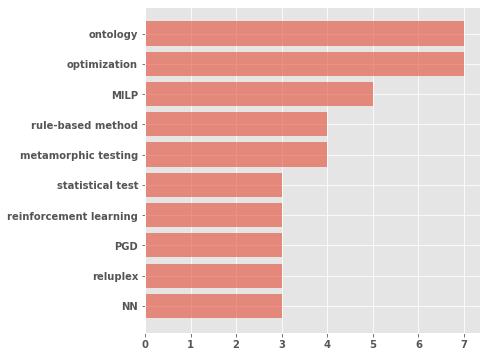

In [21]:
plt.figure(figsize=(6,6))
plt.barh(x[idx:], y[idx:], alpha=0.6);

In [22]:
years = []
for key in t:
    for term in x[idx:]:
        if term in t[key]:
            years.append(key)

In [23]:
set(years)

{1992,
 1993,
 1997,
 2001,
 2005,
 2006,
 2008,
 2010,
 2012,
 2014,
 2016,
 2017,
 2018,
 2019}

We can group this into:  

* 1992-97
* 2001-06
* 2008-12
* 2014-19

In [24]:
groups = [
    (1992, 1998),
    (2001, 2007),
    (2008, 2013),
    (2014, 2020)
]

In [25]:
# Generate a map to indices
tmap = { x[idx:][::-1][i]: i for i in range(len(x[idx:])) }

In [26]:
tmap

{'ontology': 0,
 'optimization': 1,
 'MILP': 2,
 'rule-based method': 3,
 'metamorphic testing': 4,
 'statistical test': 5,
 'reinforcement learning': 6,
 'PGD': 7,
 'reluplex': 8,
 'NN': 9}

In [27]:
arr = np.zeros((10, 4))

# For each year
for year in t:
    # For each year-group
    for i, group in enumerate(groups):
        # If this is a year we're interested in
        if year in range(*group):
            # Go over all the topics in that year
            for topic in t[year]:
                # If this is a topic we're interested in
                if topic in tmap.keys():
                    # Add it
                    arr[tmap[topic]][i] += 1

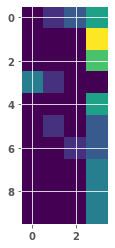

In [28]:
plt.imshow(arr)

In [29]:
map_df = pd.DataFrame(arr, index=tmap.keys(), columns=['-'.join([str(y) for y in x]) for x in groups])

In [30]:
map_df

,1992-1998,2001-2007,2008-2013,2014-2020
ontology,0.0,1.0,2.0,4.0
optimization,0.0,0.0,0.0,7.0
MILP,0.0,0.0,0.0,5.0
rule-based method,3.0,1.0,0.0,0.0
metamorphic testing,0.0,0.0,0.0,4.0
statistical test,0.0,1.0,0.0,2.0
reinforcement learning,0.0,0.0,1.0,2.0
PGD,0.0,0.0,0.0,3.0
reluplex,0.0,0.0,0.0,3.0
NN,0.0,0.0,0.0,3.0


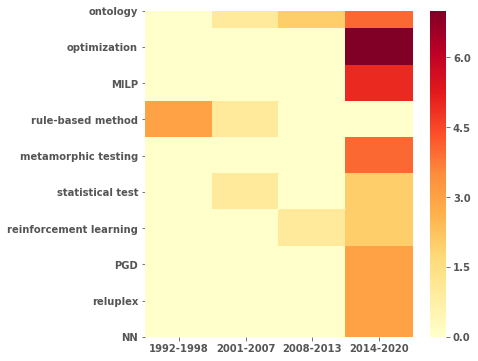

In [31]:
plt.figure(figsize=(6,6))
sns.heatmap(map_df, cmap='YlOrRd');